# Electric Field of a Distribution of Point Charges

Coulomb's Law:  

The force of test charge Q located at point P (at the position $\mathcal{r}$), coming from a single point charge $q_0$ located at $\mathcal{r}_0$ is given by:  

$$\mathrm{F_0} = k\dfrac{q_0 Q}{(r-r_0)^2}
\dfrac{r-r_0}{|r-r_0|}$$  

where Coulomb's constant is $k = \dfrac{1}{4\pi \epsilon_0}$ in SI units ($\epsilon_0$ is the permittivity of free space.)  
The force is proportional to the product of two charges, inversely proportional to the square of the distance between the two charges, and points along the line from charge $q_0$ to charge $Q$. The electric field is then the ratio of the forces $\mathrm{F_0}$ with the test charge $Q$ in the limit where the magnitude of the test charge goes to zero. In practice, this gives us:  

$$E_0(r)=kq_0\dfrac{r-r_0}{|r-r_0|^3}$$  

where we cancelled out the $Q$ and also took the opportunity to combine the two denominators. This is the electric field at the location of $r$ due to the point charge $q_0$ at $r_0$

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
plt.rcParams['figure.figsize']=(8,8)
plt.rcParams['figure.dpi']=300

In [2]:
def makefields(xs,ys):
    qtopos = {-1:(-1,0),1:(1,0)}
    n = len(xs)
    Exs = [[0.0 for k in range(n)]for j in range(n)]
    Eys = deepcopy(Exs)
    for j,x in enumerate(xs):
        for k,y in enumerate(ys):
            for q,pos in qtopos.items():
                posx,posy = pos
                R = np.sqrt((x-posx)**2+(y-posy)**2)
                Exs[k][j]+=q*(x-posx)/R**3
                Eys[k][j]+=q*(y-posy)/R**3
    return Exs,Eys

In [7]:
def plotfield(boxl,n):
    xs = [-boxl + i*2*boxl/(n-1) for i in range(n)]
    ys = xs[:]
    Exs,Eys = makefields(xs,ys)
    xs = np.array(xs); ys = np.array(ys)
    Exs = np.array(Exs); Eys = np.array(Eys)
    plt.streamplot(xs,ys,Exs,Eys,density=4,color='k',linewidth=0.5)

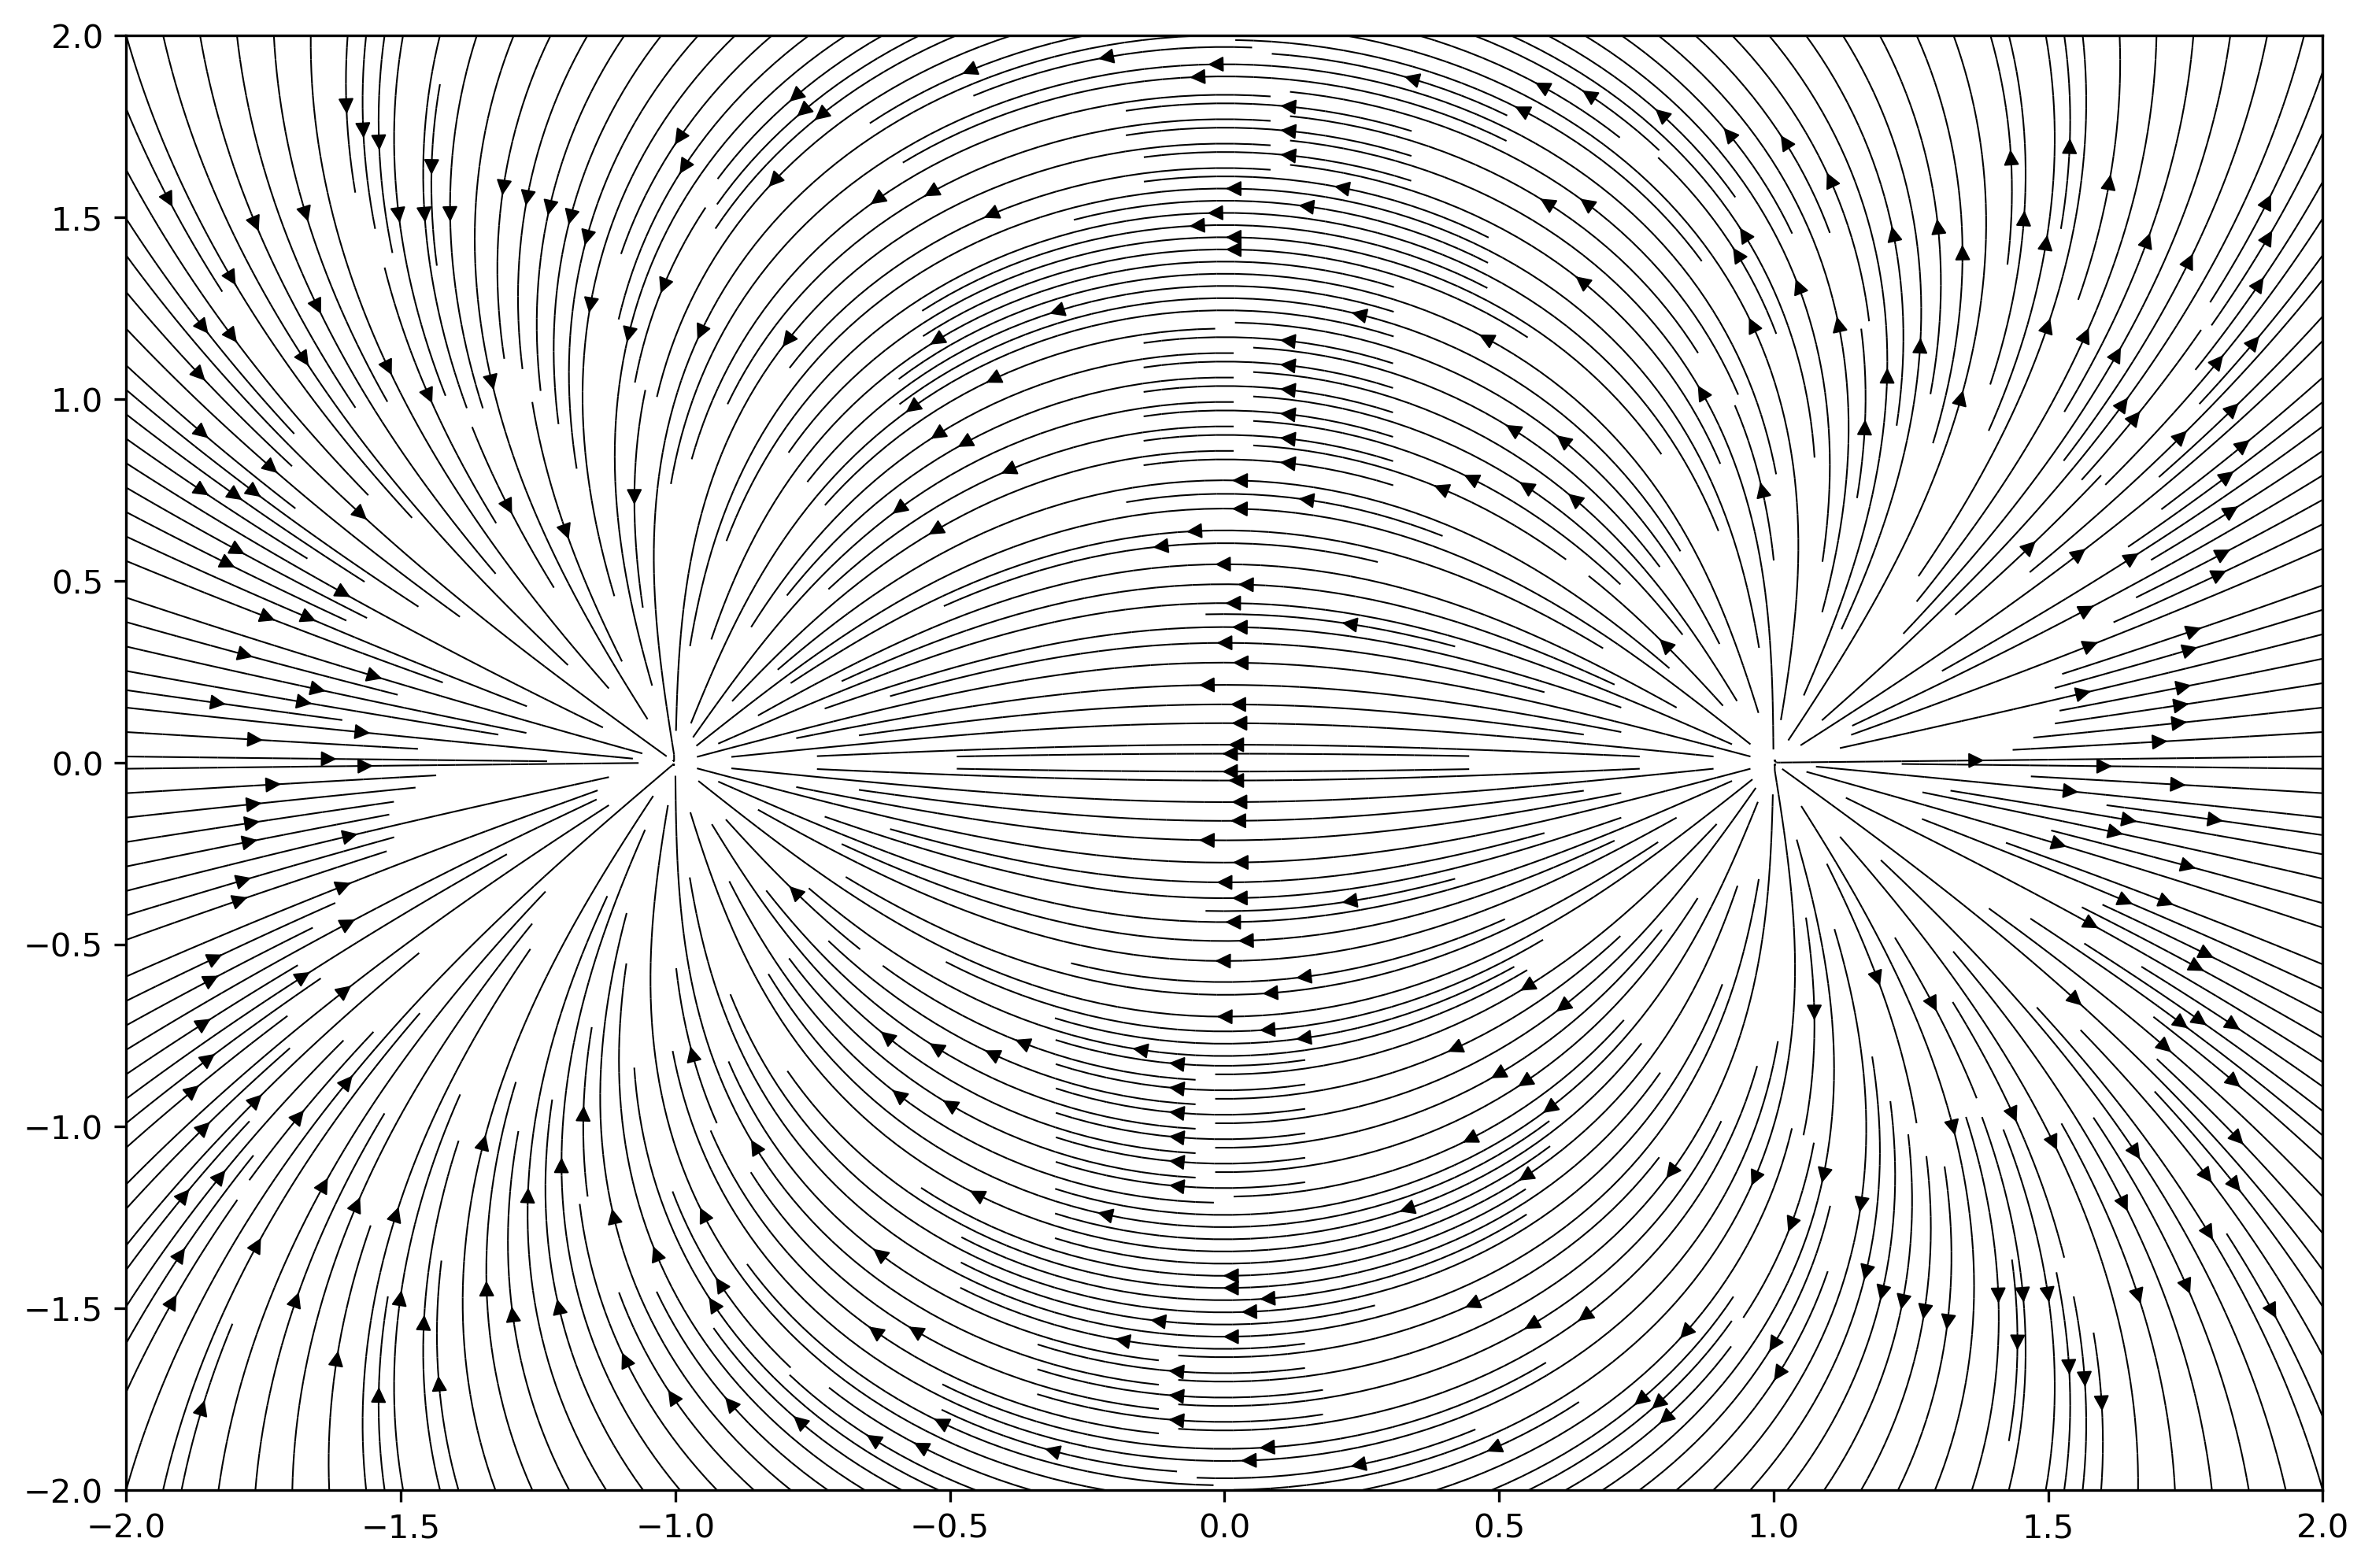

In [8]:
plotfield(2,1000)

In [82]:
def makefields(xs, ys):
    # charge : co-ordinates
    qtopos = {-1: (-1, 0), 1: (1, 0), -2: (0, -1), 2: (0, 1)}
    n = len(xs)
    Exs = [[0.0 for k in range(n)] for j in range(n)]
    Eys = deepcopy(Exs)
    
    for j, x in enumerate(xs):
        for k, y in enumerate(ys):
            for q, pos in qtopos.items():
                posx, posy = pos
                R = np.sqrt((x - posx)**2 + (y - posy)**2)
                Exs[k][j] += q * (x - posx) / R**3
                Eys[k][j] += q * (y - posy) / R**3
    return Exs, Eys

In [83]:
def plotfield(boxl,n):
#     xs = [-boxl + i*2*boxl/(n-1) for i in range(n)]
    xs = np.linspace(-boxl, boxl, n)
    ys = xs[:]
    Exs,Eys = makefields(xs,ys)
    xs = np.array(xs); ys = np.array(ys)
    Exs = np.array(Exs); Eys = np.array(Eys)
    plt.figure()
    plt.streamplot(xs,ys,Exs,Eys,density=2,color='k',linewidth=0.3)
    qtopos = {-1: (-1, 0), 1: (1, 0), -2: (0, -1), 3: (0, 1)}
    charges = {-1:('o','r'), 1:('o','r'), -2:('o','r'), 3:('o','r')}
    for charge, params in charges.items():
        x, y = qtopos[charge]
        marker,color = params
        plt.scatter(x, y, marker=marker, color=color, s=charge**2*100)
        plt.annotate(f"q = {charge}", xy=(x,y),xytext=(x+0.1,y+0.1),size=20)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Electric Field')
    plt.grid(True)
    plt.show()

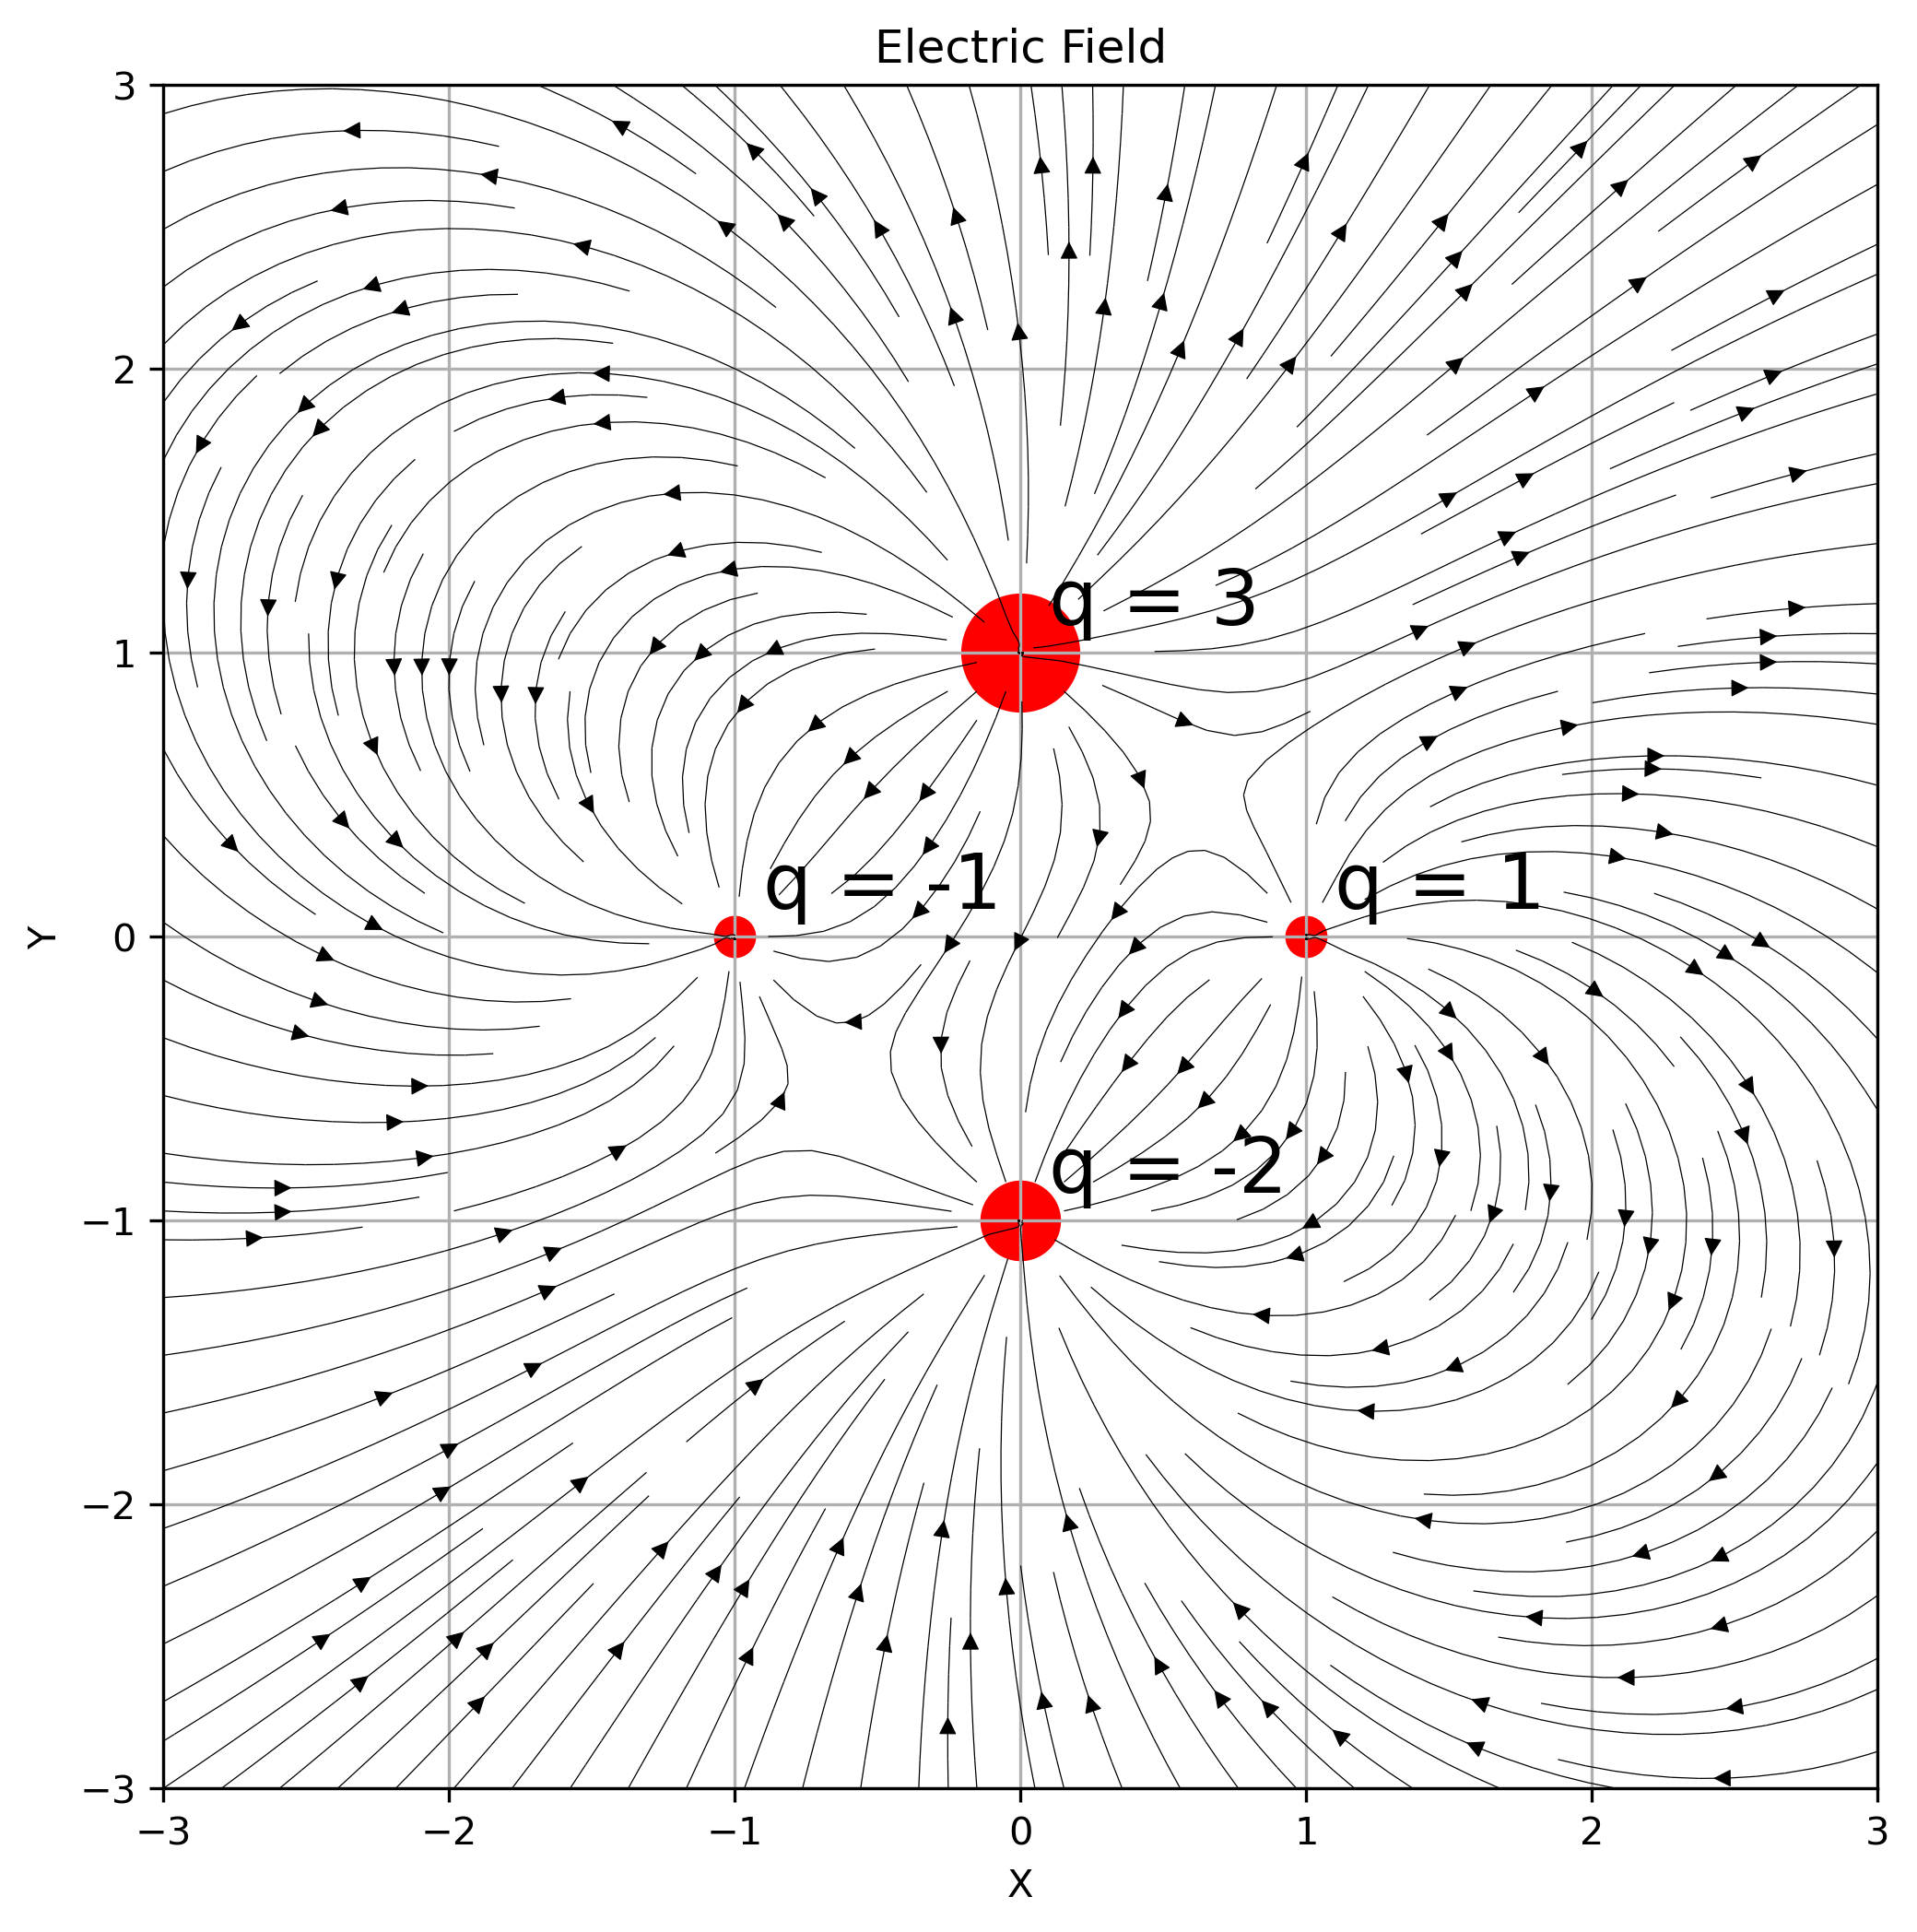

In [84]:
plotfield(3,100)

{1: (1.0, 0.0, 1), 2: (0.984807753012208, 0.17364817766693033, 1), 3: (0.9396926207859084, 0.3420201433256687, 1), 4: (0.8660254037844387, 0.49999999999999994, 1), 5: (0.7660444431189781, 0.6427876096865393, 1), 6: (0.6427876096865394, 0.766044443118978, 1), 7: (0.5000000000000001, 0.8660254037844386, 1), 8: (0.3420201433256688, 0.9396926207859083, 1), 9: (0.17364817766693041, 0.984807753012208, 1), 10: (6.123233995736766e-17, 1.0, 1), 11: (-0.1736481776669303, 0.984807753012208, 1), 12: (-0.3420201433256687, 0.9396926207859084, 1), 13: (-0.4999999999999998, 0.8660254037844388, 1), 14: (-0.6427876096865393, 0.7660444431189781, 1), 15: (-0.7660444431189779, 0.6427876096865395, 1), 16: (-0.8660254037844387, 0.49999999999999994, 1), 17: (-0.9396926207859083, 0.3420201433256689, 1), 18: (-0.984807753012208, 0.1736481776669307, 1), 19: (-1.0, 1.2246467991473532e-16, 1), 20: (-0.9848077530122081, -0.17364817766693003, 1), 21: (-0.9396926207859084, -0.34202014332566866, 1), 22: (-0.8660254037

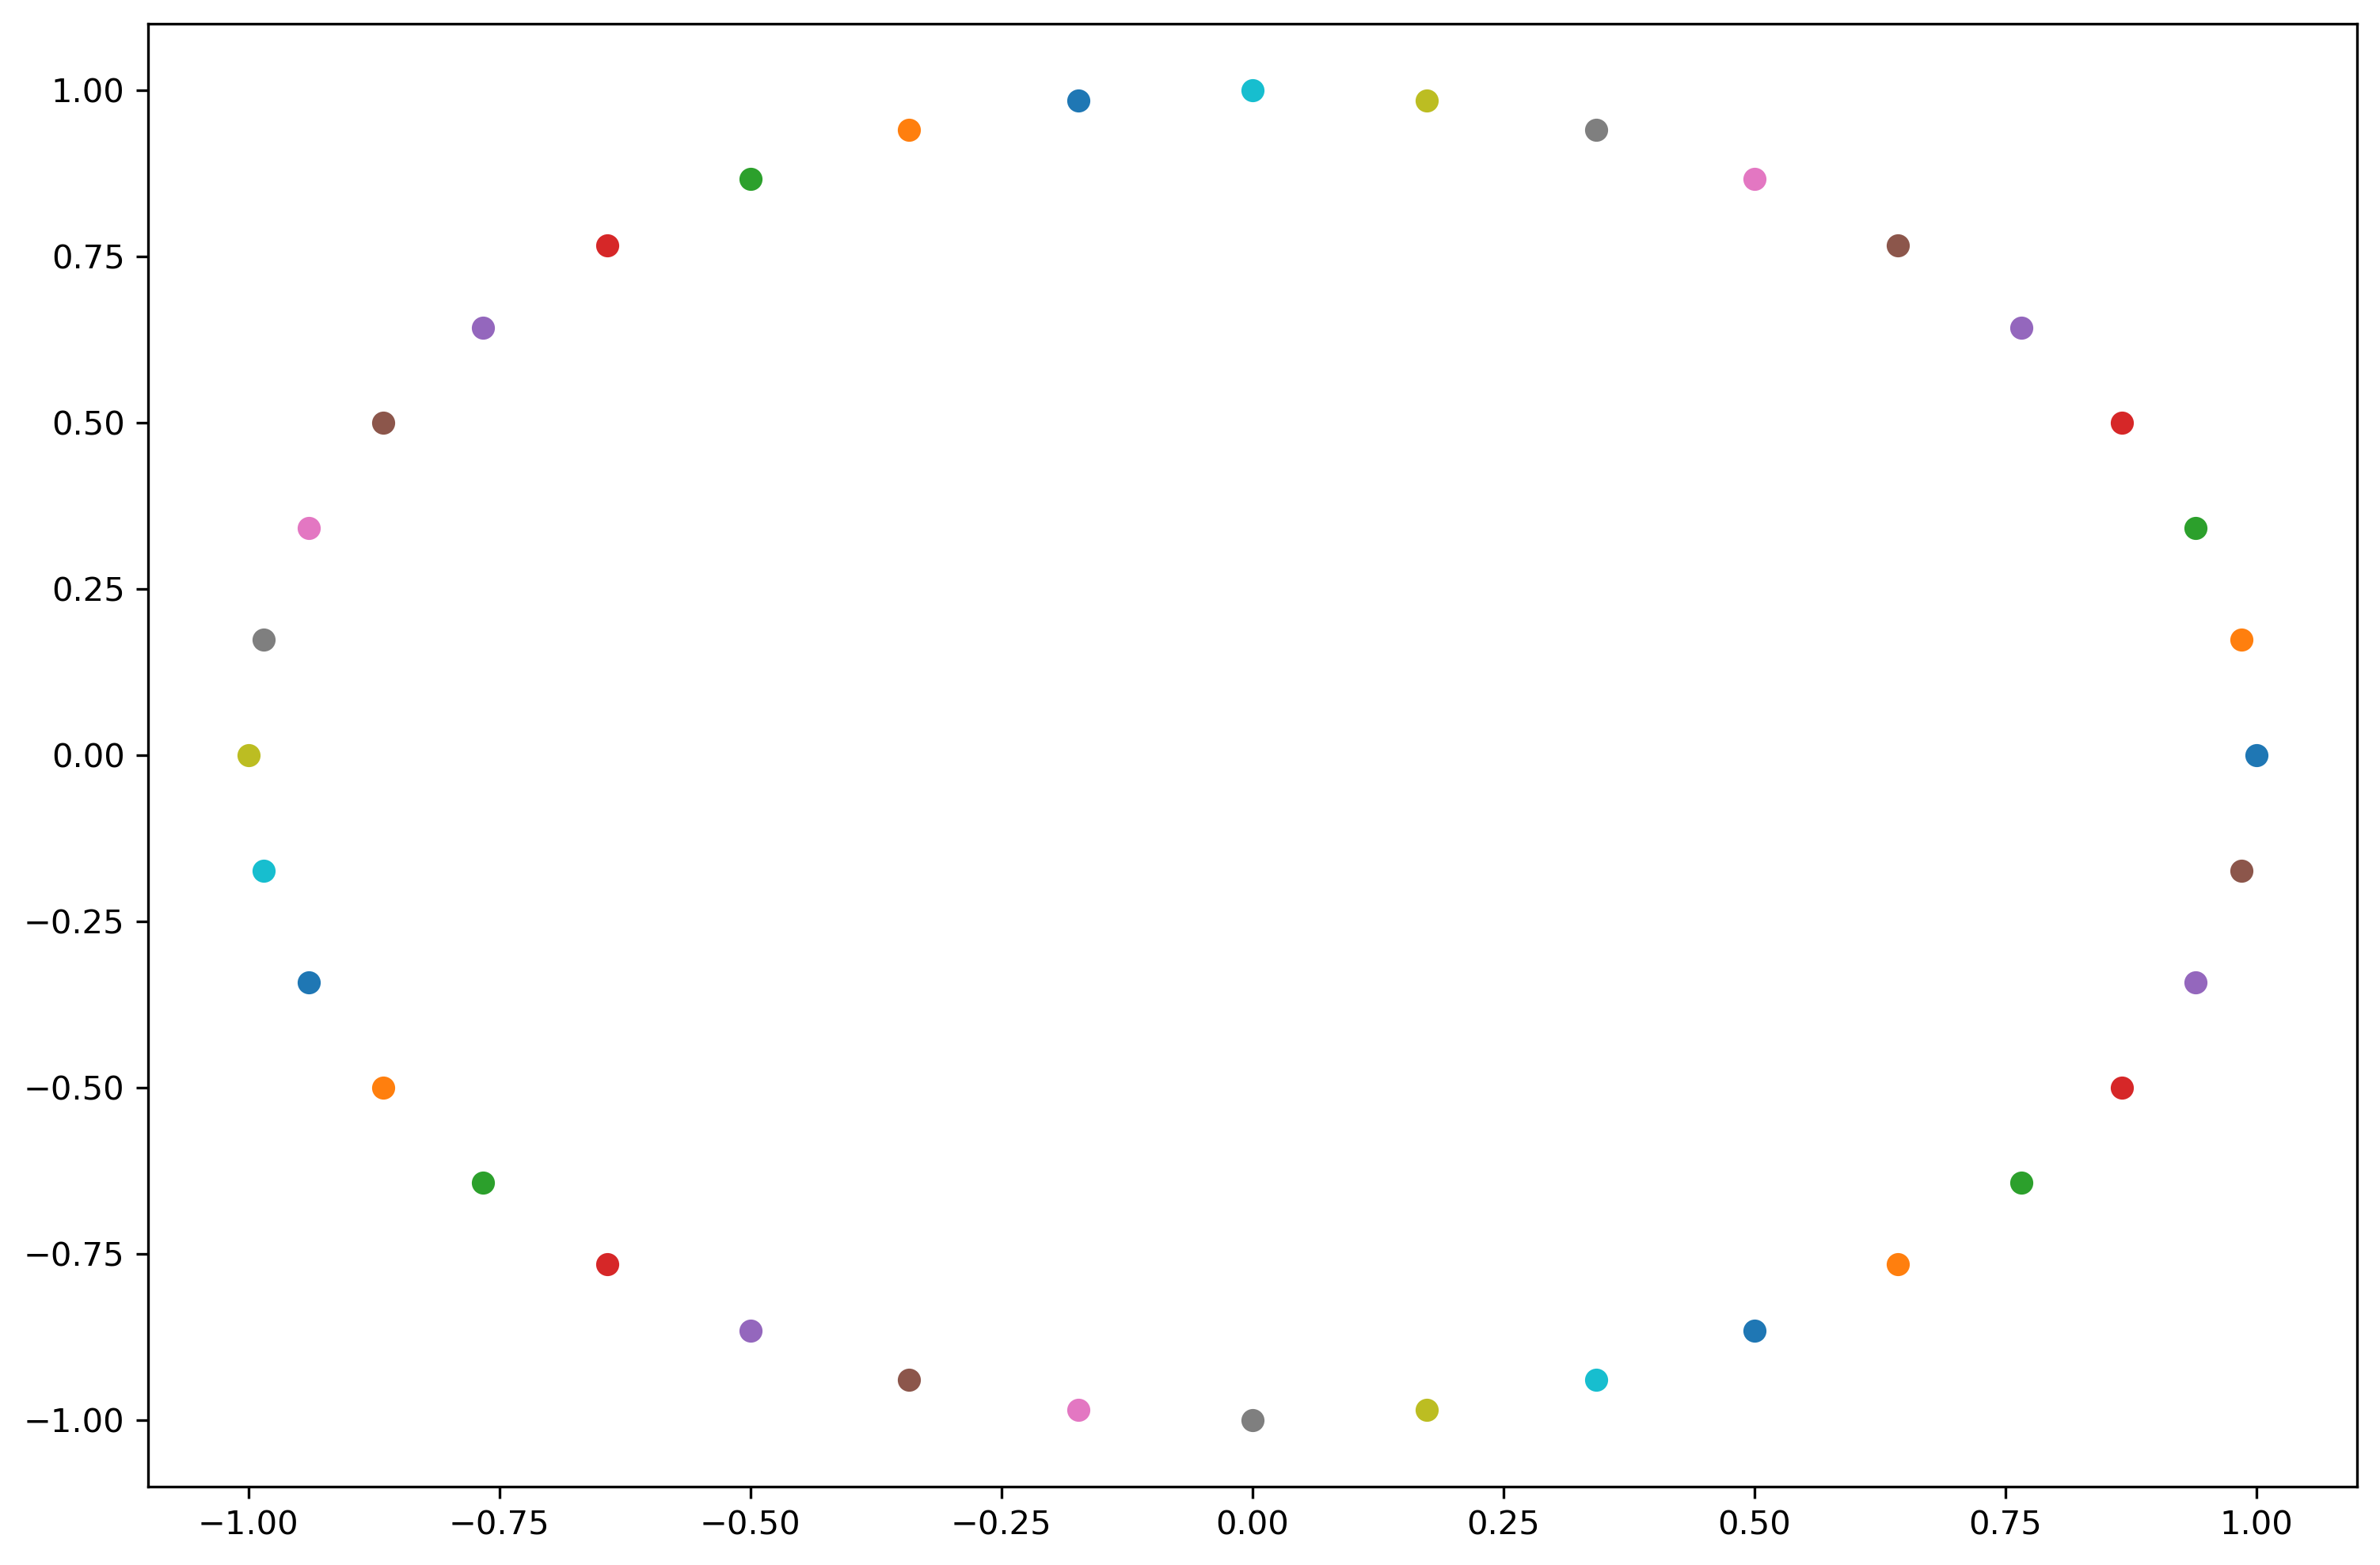

In [68]:
def generate_circle_points(q,num_points, radius):
    angles = np.linspace(0, 2*np.pi, num_points, endpoint=False)
    x_coords = radius * np.cos(angles)
    y_coords = radius * np.sin(angles)
    qtopos = {i: (x, y, q) for i, (x, y) in enumerate(zip(x_coords, y_coords), start=1)}
    return qtopos

# Example usage
num_points = 36
radius = 1.0
qtopos = generate_circle_points(1, num_points, radius)
print(qtopos)
for q,pos in qtopos.items():
    x,y,_ = pos
    plt.scatter(x,y)

In [80]:
def makefields(xs, ys):
    # charge : co-ordinates
    def generate_circle_points(q,num_points, radius):
        angles = np.linspace(0, 2*np.pi, num_points, endpoint=False)
        x_coords = radius * np.cos(angles)
        y_coords = radius * np.sin(angles)
        qtopos = {i: (x, y, q) for i, (x, y) in enumerate(zip(x_coords, y_coords), start=1)}
        return qtopos

    num_points = 360
    radius = 1.0
    
    qtopos = generate_circle_points(1, num_points, radius)
    
    n = len(xs)
    Exs = [[0.0 for k in range(n)] for j in range(n)]
    Eys = deepcopy(Exs)
    
    for j, x in enumerate(xs):
        for k, y in enumerate(ys):
            for q, params in qtopos.items():
                posx, posy, charge = params
                R = np.sqrt((x - posx)**2 + (y - posy)**2)
                Exs[k][j] += charge * (x - posx) / R**3
                Eys[k][j] += charge * (y - posy) / R**3
    return Exs, Eys, qtopos

def plotfield(boxl,n):
#     xs = [-boxl + i*2*boxl/(n-1) for i in range(n)]
    xs = np.linspace(-boxl, boxl, n)
    ys = xs[:]
    Exs, Eys, qtopos = makefields(xs,ys)
    xs = np.array(xs); ys = np.array(ys)
    Exs = np.array(Exs); Eys = np.array(Eys)
    plt.figure()
    plt.streamplot(xs,ys,Exs,Eys,density=3,color='k',linewidth=0.3)
    #qtopos = {-1: (-1, 0), 1: (1, 0), -2: (0, -1), 3: (0, 1)}
    #charges = {-1:('o','r'), 1:('o','r'), -2:('o','r'), 3:('o','r')}
    for q, params in qtopos.items():
        x, y, charge = params
        marker,color = 'o','k'
        plt.scatter(x, y, marker=marker, color=color, s=charge*2)
        #plt.annotate(f"q = {charge}", xy=(x,y),xytext=(x+0.1,y+0.1),size=20)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Electric Field')
    plt.grid(True)
    plt.show()

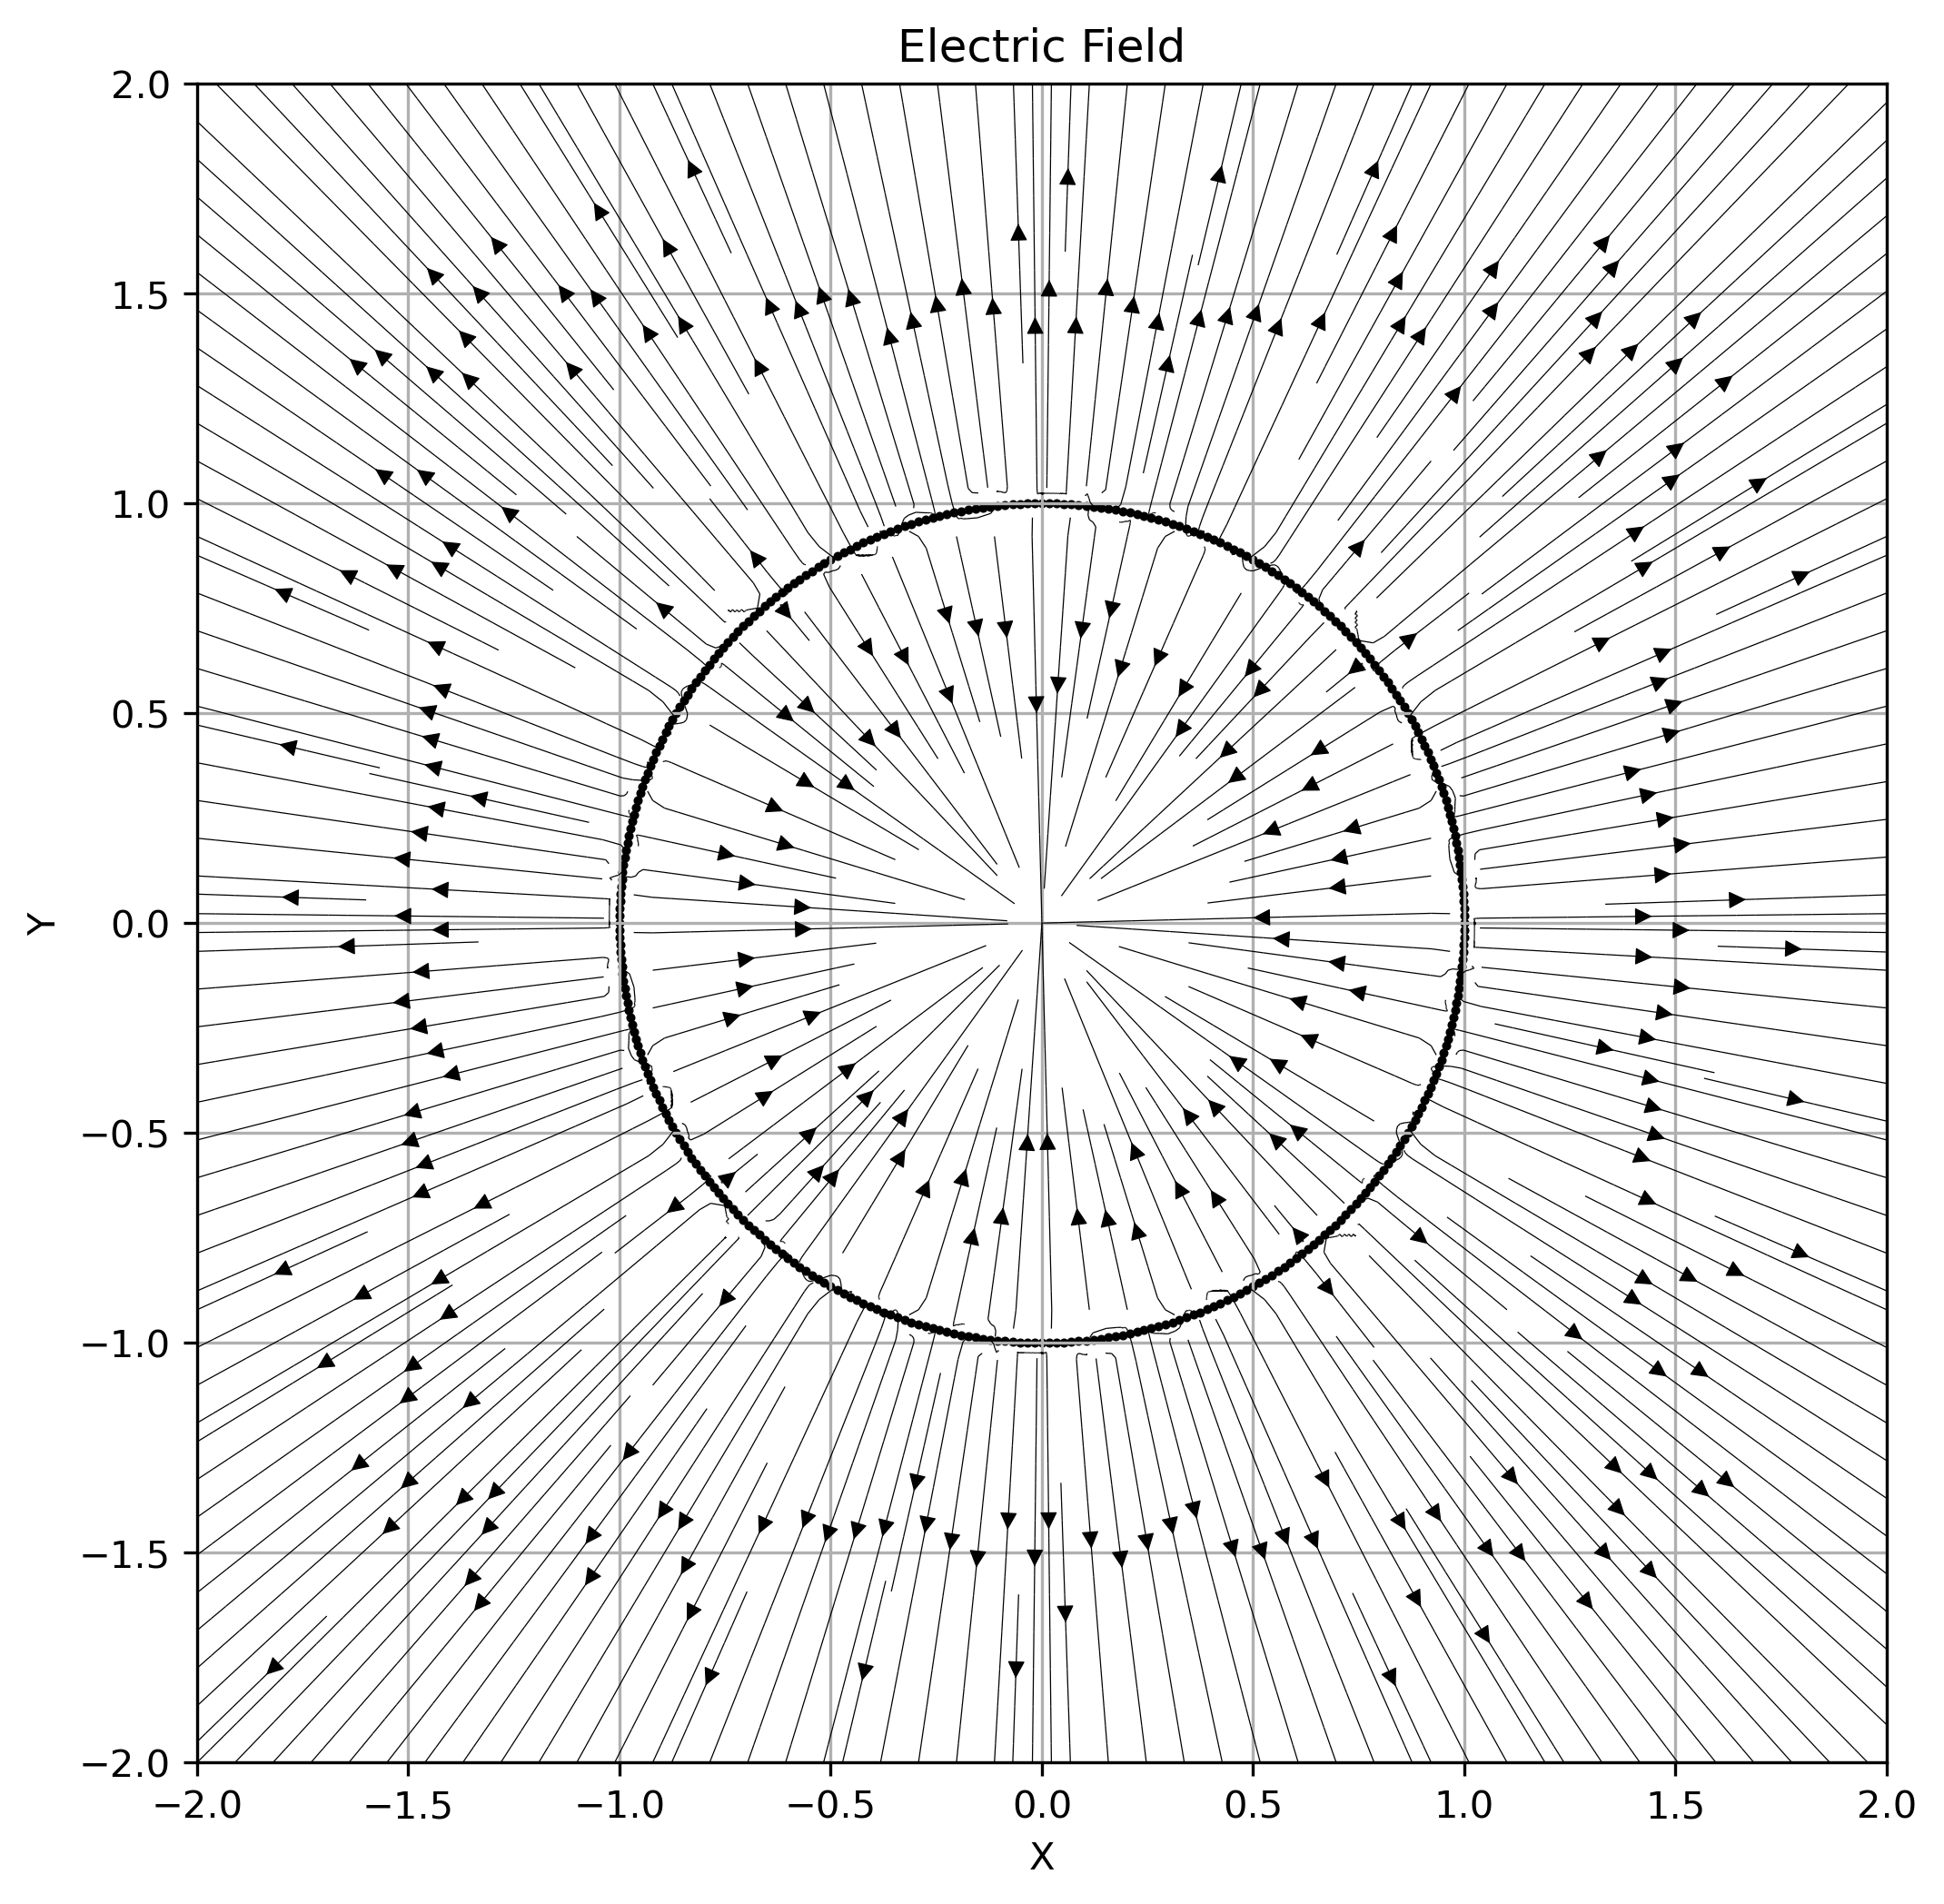

In [81]:
plotfield(2,100)